In [1]:
import os

from dotenv import load_dotenv
from usd_idr_forecasting.data.datasets import DatasetLoader
from usd_idr_forecasting.configs import ProjectConfig

load_dotenv()
PROJECT_WORKING_DIR = os.getenv("PROJECT_WORKING_DIR")

/Users/heykalsayid/Desktop/myown/machine_learning/usd-idr-forecasting/.venv/lib/python3.11/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /Users/heykalsayid/.netrc
wandb: Currently logged in as: heykalsayid (danielteam) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [2]:
config_path = os.path.join(PROJECT_WORKING_DIR, 'project_configs.yaml')
project_config = ProjectConfig.from_yaml(config_path=config_path)
project_config

ProjectConfig(project_name='idrx-forecast', wandb_team_name='danielteam', general={'windowing_size': 42, 'target_size': 1, 'batch_size': [8, 16, 32], 'shuffle_buffer_size': None}, model={'learning_rate': 0.0005, 'momentum': 0.9, 'optimizer': ['adam'], 'epochs': 50, 'rnn': {'units': 128, 'return_sequences': True}, 'conv1d': {'filter': 32, 'kernel_size': 3, 'strides': 1, 'padding': 'causal', 'activation': 'relu', 'name': 'conv1d'}, 'max_pooling_1d': 42, 'dropout': 0.2, 'feed_forward_layer': {'dense_1': {'dense': 10, 'activation': 'relu', 'name': 'dense_1'}, 'output': {'dense': 1, 'name': 'output'}}}, tuner={'batch_size': 32, 'rnn_units': {'min_value': 50, 'max_value': 200, 'step': 30}, 'conv1d': {'filter': {'min_value': 50, 'max_value': 100, 'step': 25}, 'kernel_size': [3, 42]}, 'max_pool1d': {'name': 'max_pool1d'}, 'flattening_layer': ['GlobalAveragePooling1D', 'GlobalMaxPool1D'], 'batch_norm': {'name': 'batch_norm'}, 'dropout': {'name': 'dropout', 'rate': [0.25, 0.2]}, 'dense_units': [

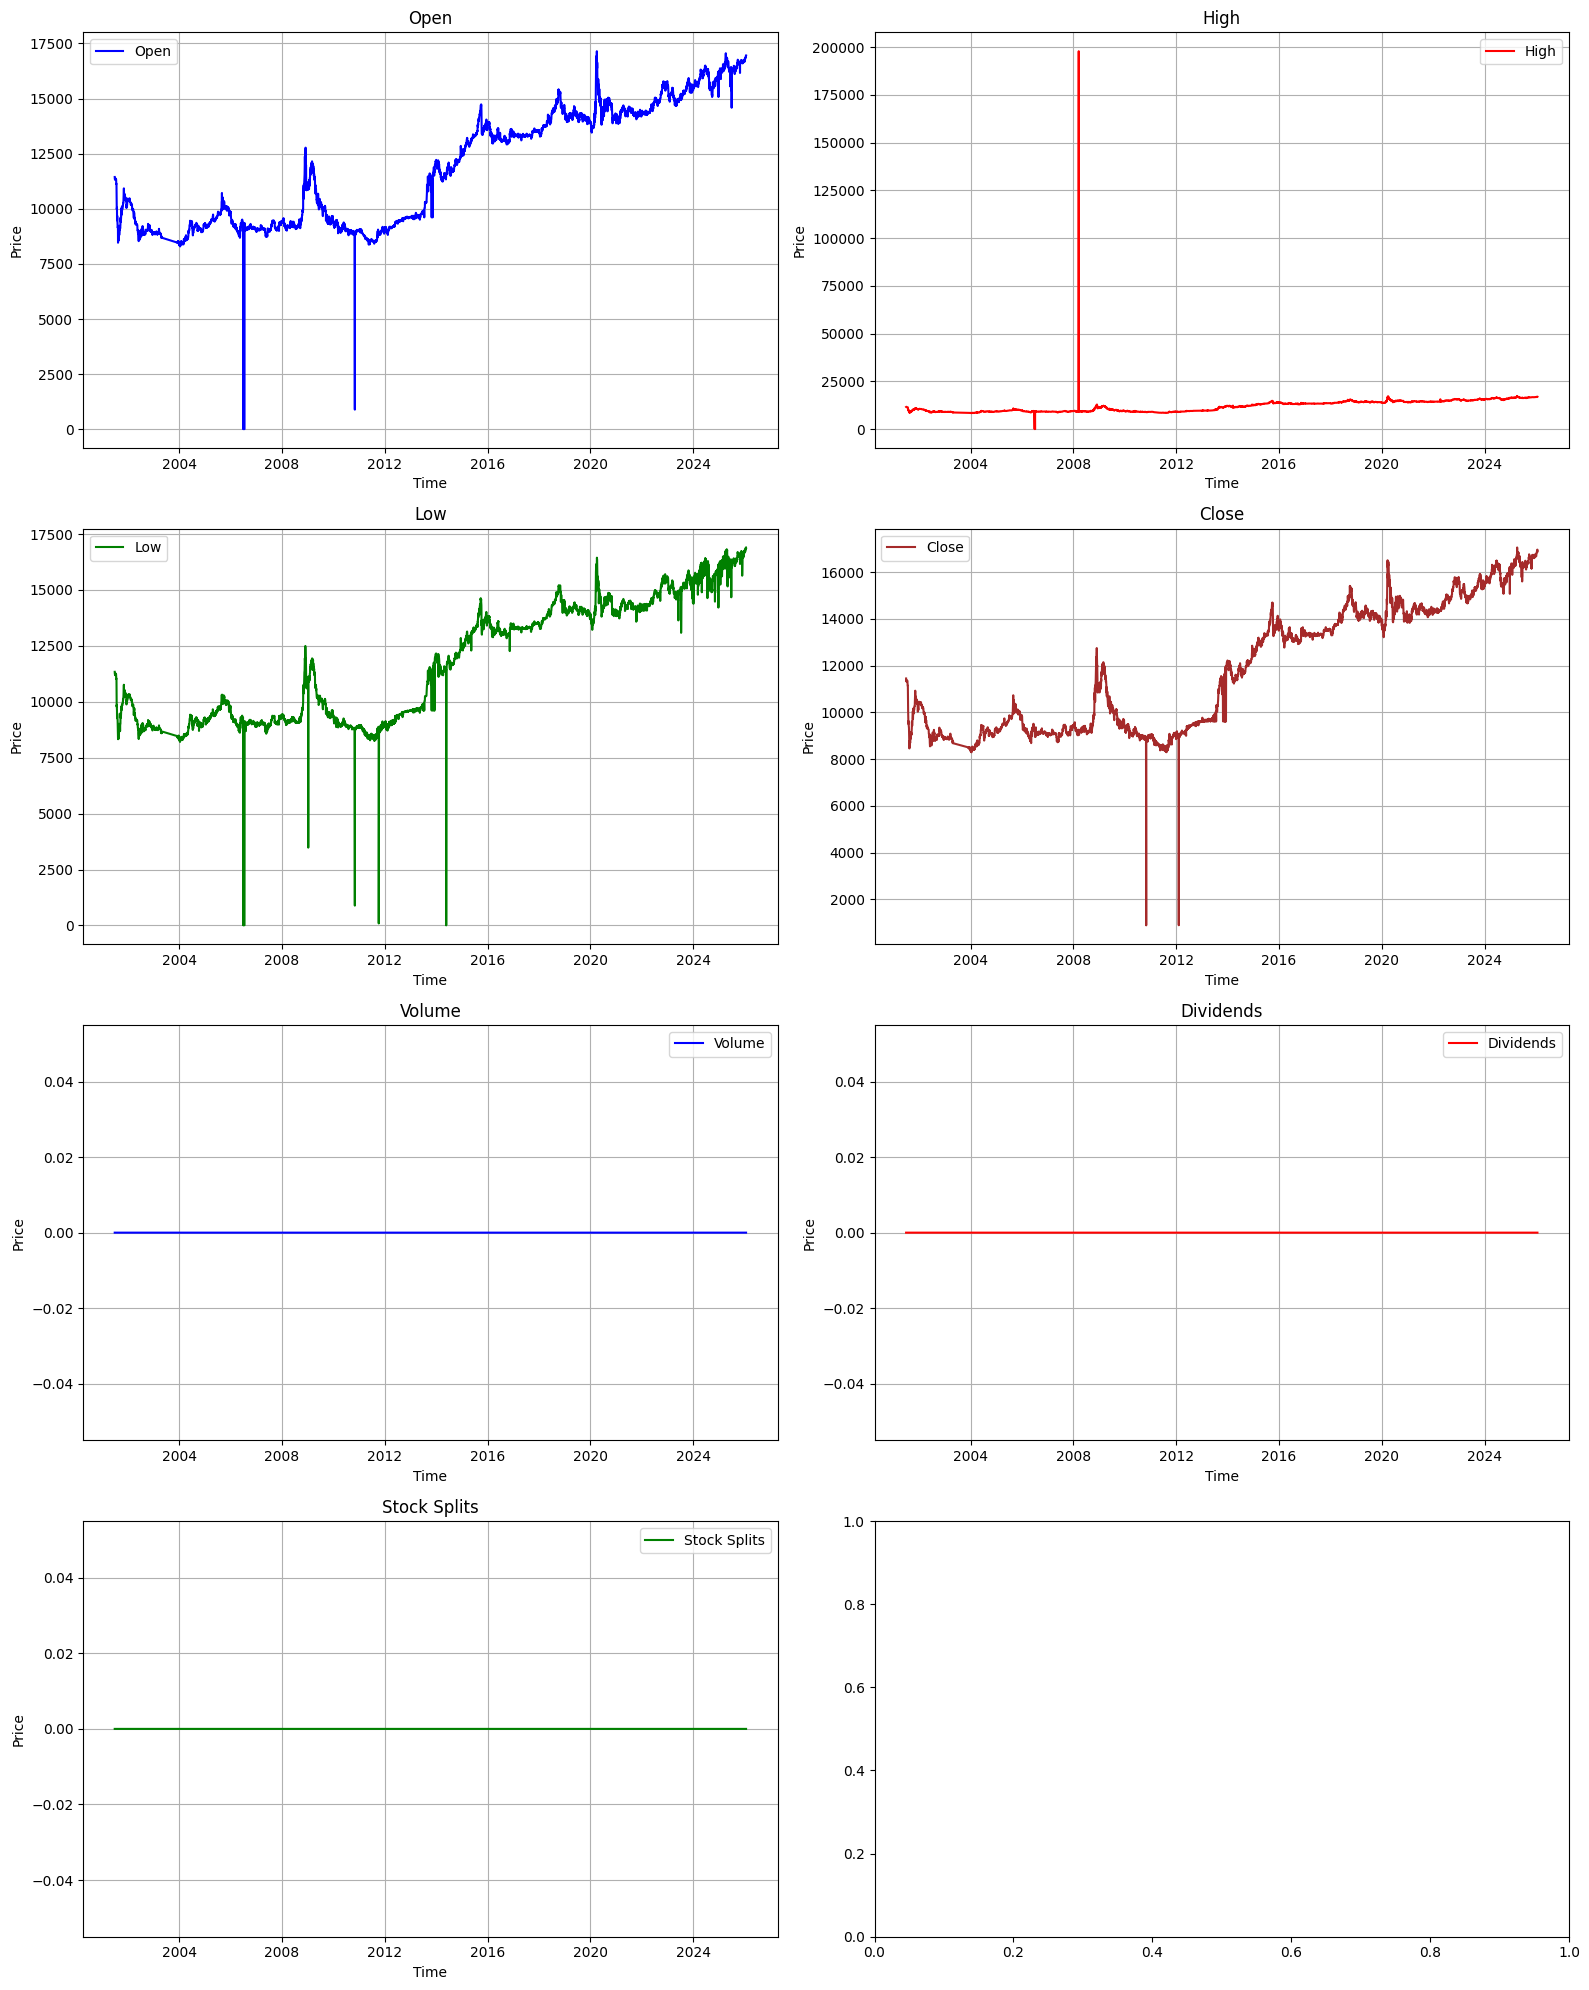

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2001-06-28 00:00:00+01:00,11441.000000,11565.000000,11338.000000,11448.000000,0,0.0,0.0
2001-06-29 00:00:00+01:00,11370.000000,11510.000000,11265.000000,11390.000000,0,0.0,0.0
2001-07-02 00:00:00+01:00,11315.000000,11490.000000,11215.000000,11320.000000,0,0.0,0.0
2001-07-03 00:00:00+01:00,11330.000000,11455.000000,11188.000000,11322.000000,0,0.0,0.0
2001-07-04 00:00:00+01:00,11355.000000,11465.000000,11251.000000,11365.000000,0,0.0,0.0
...,...,...,...,...,...,...,...
2026-01-16 00:00:00+00:00,16878.900391,16920.599609,16866.300781,16878.900391,0,0.0,0.0
2026-01-19 00:00:00+00:00,16902.000000,17003.599609,16884.000000,16876.599609,0,0.0,0.0
2026-01-20 00:00:00+00:00,16939.000000,16993.300781,16897.500000,16939.000000,0,0.0,0.0


In [3]:
dataset_loader = DatasetLoader(config=project_config)

save_path = os.path.join(PROJECT_WORKING_DIR, 'datasets', 'originals', 'idrx.csv')
idrx_df = dataset_loader.load_all(show_viz=True, save_path=save_path)
idrx_df